In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [49]:
fig = plt.figure()

with open('C:\\Users\\dil-p\\Earring++\\Earring-\\PPGData\\finger\\eric_finger.txt', 'r') as file1:
    groupIR = []
    for line in file1:
        groupIR.append(float(line))
        '''
        if(line.split('=')[0] == 'RED'):
            groupR.append(float(line.split('=')[1]))
        elif(line.split('=')[0] == 'IR'):
            groupIR.append(float(line.split('=')[1]))
        else:
            groupG.append(float(line.split('=')[1]))'''
            
dataIR = np.transpose(groupIR)
y = signal.resample(dataIR,dataIR.size)
totTime = (dataIR.size*20)/1000
x = np.arange(0,totTime,totTime/dataIR.size)
y-=np.mean(dataIR)
y = -y

<Figure size 640x480 with 0 Axes>

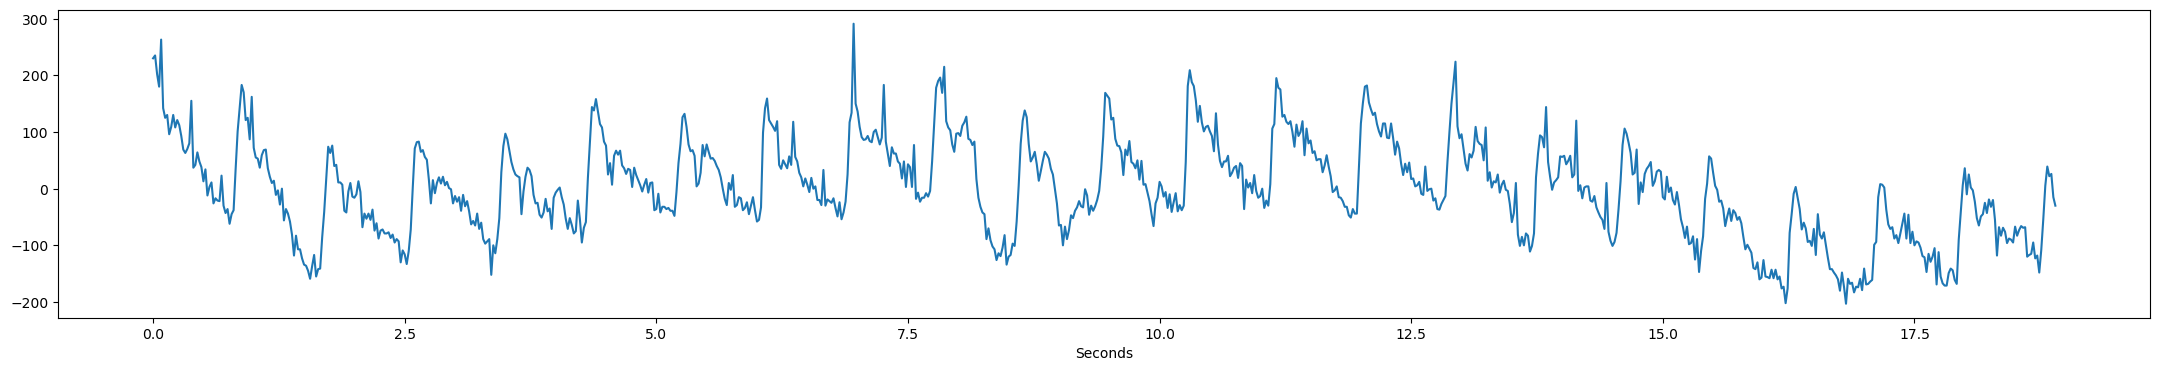

In [50]:
# 50Hz
f = plt.figure()
f.set_size_inches(27,4) 
plt.xlabel("Seconds")
plt.plot(x[:-1],y)
#plt.scatter(x, y)

In [51]:
# look into why the signal is drifting
# invert the signal, take the average and subtract from that

# functions for there:
# calc heart rate & heart rate variation
# low pass filter(removes the noise in the smaller peaks) & high pass filter(removes the trend of the signal), threshold & cutoff frequency


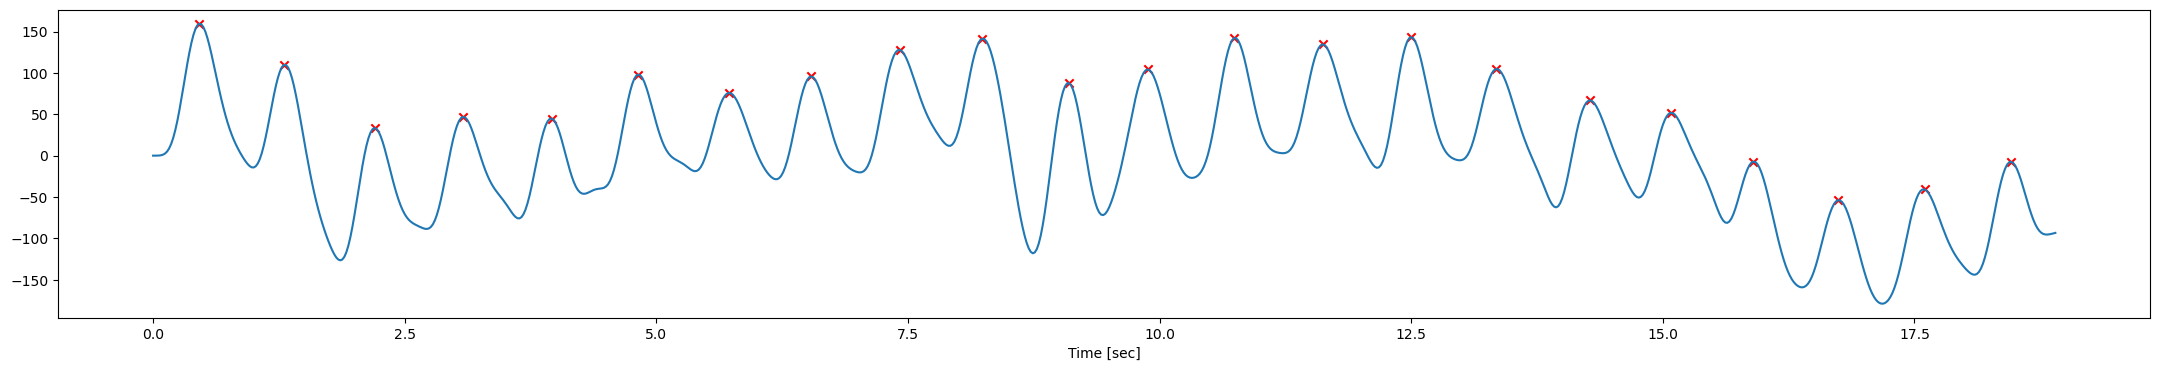

In [77]:
def butter_lowpass(cutoff, fs, order=5):
    return signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

# Filter requirements:
order = 6
fs = 50       # sample rate, Hz
cutoff = 2

# Calculate filtered signal & find peaks:
y_new = butter_lowpass_filter(y, cutoff, fs, order)
peaks,properties = signal.find_peaks(y_new, distance = 13.88)

# Plot the filtered signal

f_2 = plt.figure()
f_2.set_size_inches(27,4) 

plt.plot(x[:-1], y_new)
plt.xlabel('Time [sec]')
plt.scatter(x[peaks], y_new[peaks], marker = "x", color = 'r')
plt.show()

# Calculates BPM from number of peaks
numPeaks = peaks.size
bpm = (60/totTime) * numPeaks
